# Assignment 05 | Gaussian Mixture Models (GMMs)

## Table of Contents

[1. Assignment 1](#1-assignment-01) \
     [1.1. Import module and libraries](#11-import-module-and-libraries) \
     [1.2. Train model](#12-train-model)

## 1. Assignment 01

### 1.1. Import module and libraries

First I will import neccessary libraries.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

First I will import pipeline from `lesson-05/src/implement_GMM.py`.

In [22]:
import src.implement_GMM as gmm

This class follows OOP approach. In the current class, it contains `fit()` and `predict()` functions.

### 1.2. Train model

First, we generate dataset for further training and analysis.

In [23]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=3, random_state=42)

In [24]:
# Normalize dataset
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [25]:
X[:5,:]

array([[-0.86458557, -1.37893778],
       [ 0.72863446,  0.07645297],
       [ 1.74325985, -0.03903335],
       [-0.27718914,  0.9390578 ],
       [ 1.5379987 ,  0.02226646]])

In [26]:
y[:5]

array([2, 1, 1, 0, 1])

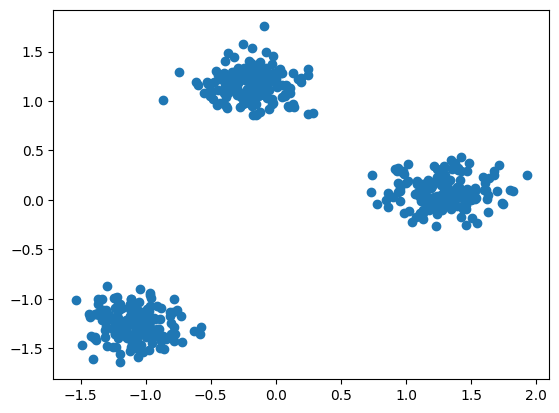

In [27]:
plt.scatter(X[:,0], X[:,1])

In [28]:
gmm = gmm.gaussian_mixture_model(n_components=3, max_iter=100, val_ratio=0.2, random_state=42)
metrics = gmm.fit(X)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_25148\3267707712.py:19: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\VICTUS\Documents\developer\uit-practicalLesson-sML\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


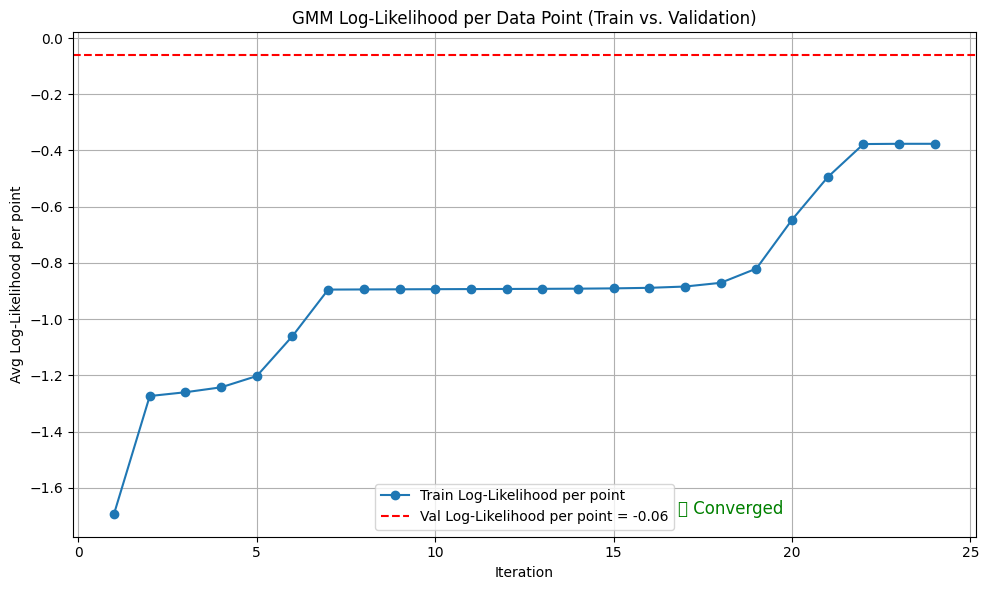

In [29]:
train_ll = np.array(metrics['train_log_likelihoods']) / len(X)
val_ll = metrics['val_log_likelihood'] / len(X)
n_iter = metrics['n_iter']
converged = metrics['converged']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_ll) + 1), train_ll, label='Train Log-Likelihood per point', marker='o')
plt.axhline(val_ll, color='red', linestyle='--', label=f'Val Log-Likelihood per point = {val_ll:.2f}')
plt.title('GMM Log-Likelihood per Data Point (Train vs. Validation)')
plt.xlabel('Iteration')
plt.ylabel('Avg Log-Likelihood per point')
plt.legend()
plt.grid(True)

# Chú thích trạng thái hội tụ
status_text = "🟢 Converged" if converged else "⭕ Not Converged"
plt.text(len(train_ll)*0.7, min(train_ll), status_text, fontsize=12, color='green' if converged else 'orange')

plt.tight_layout()
plt.show()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_25148\2708005727.py:8: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\VICTUS\Documents\developer\uit-practicalLesson-sML\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


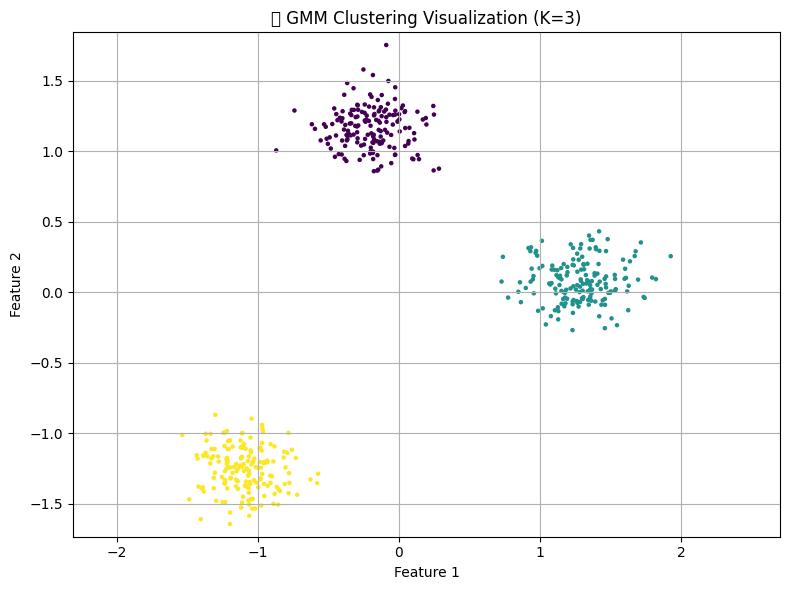

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='viridis')
plt.title('📍 GMM Clustering Visualization (K=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 2.2. Remove background

In [31]:
img = cv2.imread(r'C:\Users\VICTUS\Documents\developer\uit-practicalLesson-sML\lesson-05\cow.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

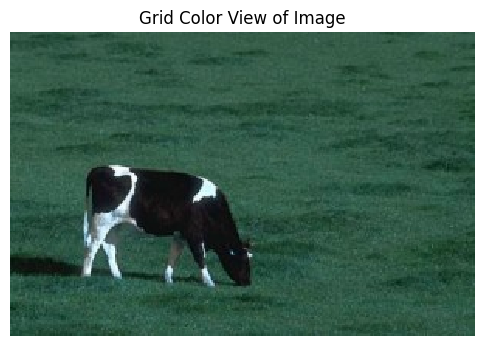

In [32]:
# Hiển thị ảnh dưới dạng các ô màu rõ ràng
plt.figure(figsize=(6, 6))
plt.imshow(img, interpolation='nearest')  # Không làm mịn, giữ rõ từng ô
plt.title("Grid Color View of Image")
plt.axis('off')
plt.show()

In [33]:
# Chuyển ảnh từ (H, W, 3) → (H*W, 3)
h, w, c = img_rgb.shape
x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
x_coords = x_coords.reshape(-1, 1) / w   # chuẩn hóa
y_coords = y_coords.reshape(-1, 1) / h

In [34]:
rgb = img_rgb.reshape(-1, 3).astype(np.float32)
pixels = np.hstack((rgb, x_coords, y_coords))

### 2.2. Train model

In [36]:
from src.implement_GMM import gaussian_mixture_model

In [37]:
gmm = gaussian_mixture_model(n_components=2, max_iter=100000)  # 2 cụm: foreground và background
gmm.fit(pixels)
labels = gmm.predict(pixels)

In [38]:
# Đếm số pixel thuộc mỗi cụm
counts = np.bincount(labels)
bg_label = np.argmax(counts)  # Label của background là cụm lớn hơn

In [42]:
print(f'Số pixel mỗi cụm là: {counts}')
print(f'Label cho cụm được xem là background: {bg_label}')

Số pixel mỗi cụm là: [51030  7770]
Label cho cụm được xem là background: 0


In [43]:
mask = (labels != bg_label).astype(np.uint8) * 255
mask = mask.reshape(h, w)

foreground = img_rgb.copy()
foreground[mask == 0] = [0, 0, 0]  # Xoá background

### 2.3. Visualize

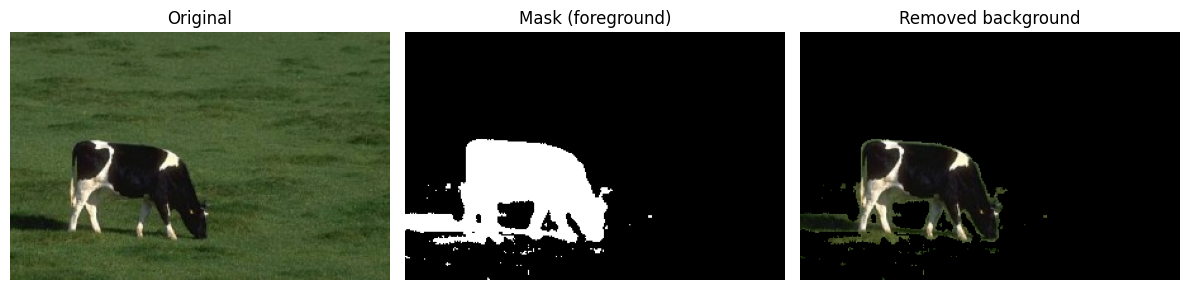

In [44]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Mask (foreground)")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Removed background")
plt.imshow(foreground)
plt.axis('off')

plt.tight_layout()
plt.show()